In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

In [139]:
def bipolar_quantizer(x, b=8, ref=1):
    return np.clip(np.round((2**b//2)*x/ref), -2**b//2, 2**b//2-1)

def sinlut(b, M):
    i = np.arange(M)
    x = (2**b//2-1) * np.sin(2*pi*i/M)
    return np.clip(np.round(x), -2**b//2, 2**b//2-1)

def coslut(b, M):
    i = np.arange(M)
    x = (2**b//2-1) * np.cos(2*pi*i/M)
    return np.clip(np.round(x), -2**b//2, 2**b//2-1)

def adder(x, y):
    return 0

# Phase to Amplitude: Sine LUT

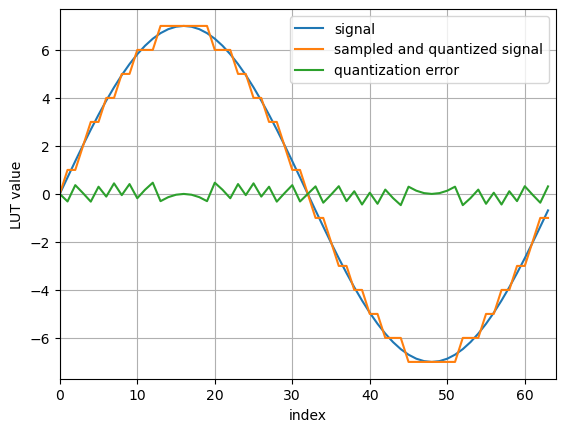

In [346]:
M = 2**6
b = 4

i = np.arange(M)
x = (2**b//2 - 1) * np.sin(2*pi*i/M)
lut = np.clip(np.round(x), -2**b//2, 2**b//2 - 1)

plt.plot(x, label='signal')
plt.plot(lut, label='sampled and quantized signal')
plt.plot(x - lut, label='quantization error')
plt.legend()
plt.grid()
plt.xlim(0, M)
plt.xlabel('index')
plt.ylabel('LUT value')
plt.show()

# Phase Accumulator

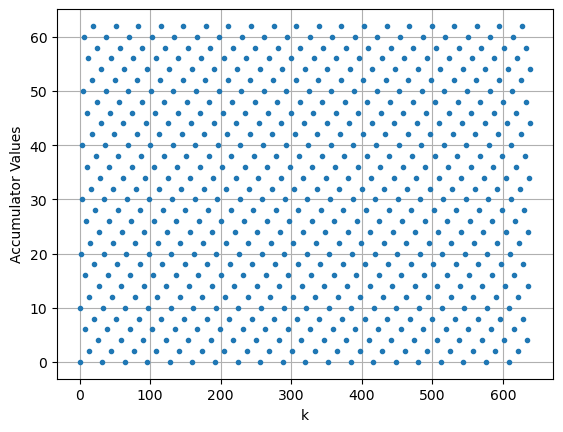

In [314]:
N = M
fcw = 10
pcw = 0
cicles = 100

acc = np.tile(np.arange(N, dtype=int), cicles)[::fcw] # for simulate truncation use np.repeat

plt.plot(acc, '.', label='signal')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accumulator Values')
plt.show()


# Join All

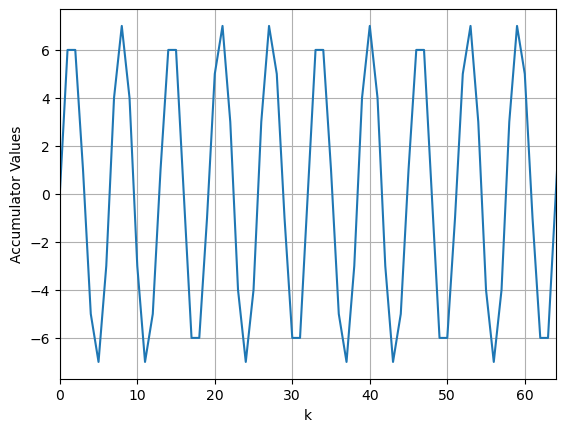

In [315]:
out = lut[acc]
plt.plot(out, '-', label='signal')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accumulator Values')
plt.xlim(0, N)
plt.show()

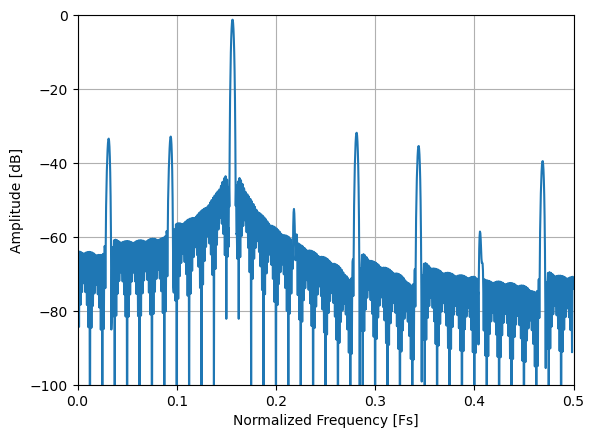

In [316]:
padding = 1000

N = len(out)
w = np.hamming(N)
X = np.fft.fftshift(np.fft.fft(np.pad(out * w/sum(w), padding)))*cicles*(2/(2**b/2)) # de donde sale ese factor por 10?
Xmag = np.abs(X)
Xphase = np.angle(X)
freq = np.arange(-1/2, 1/2, 1/(N+2*padding))

plt.plot(freq, 20*np.log10(Xmag/cicles))
plt.xlim(0, 0.5)
plt.ylim(-100, 0)
plt.xlabel('Normalized Frequency [Fs]')
plt.ylabel('Amplitude [dB]')
plt.grid()

# Truncation

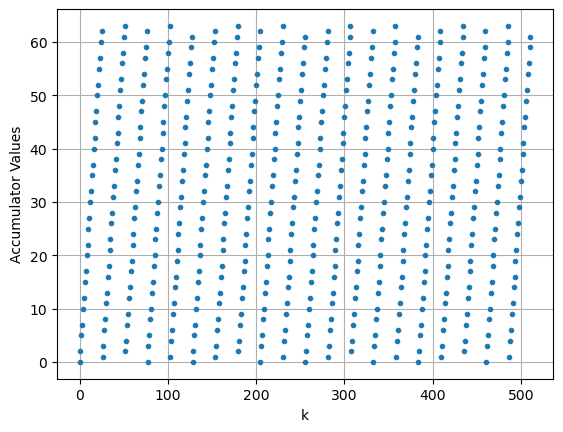

In [358]:
n = 8     # ACC register bits
m = 6     # LUT value bits
t = n - m # truncated bits

fcw = 10
pcw = 0
cicles = 20

acc = np.tile(np.repeat(np.arange(2**m, dtype=int), 2**t), cicles)[::fcw]

plt.plot(acc, '.', label='signal')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accumulator Values')
plt.show()


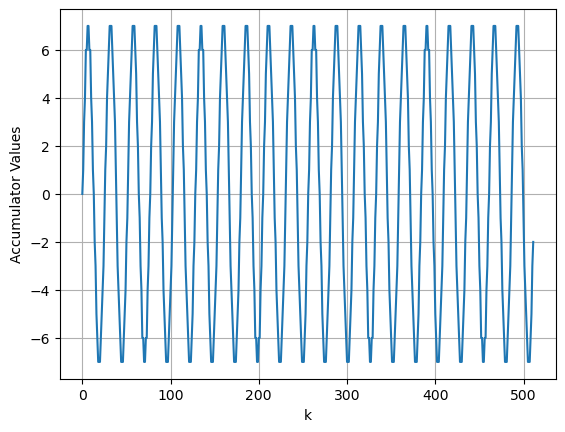

In [360]:
out = lut[acc]
plt.plot(out, '-', label='signal')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accumulator Values')
# plt.xlim(0, 2**m*cicles)
plt.show()

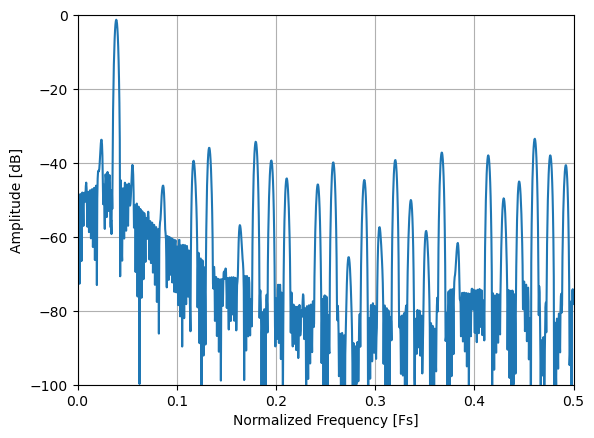

In [362]:
padding = 1000

N = len(out)
w = np.hamming(N)
X = np.fft.fftshift(np.fft.fft(np.pad(out * w/sum(w), padding)))*cicles*(2/(2**b/2)) # de donde sale ese factor por 10?
Xmag = np.abs(X)
Xphase = np.angle(X)
freq = np.arange(-1/2, 1/2, 1/(N+2*padding))

plt.plot(freq, 20*np.log10(Xmag/cicles))
plt.xlim(0, 0.5)
plt.ylim(-100, 0)
plt.xlabel('Normalized Frequency [Fs]')
plt.ylabel('Amplitude [dB]')
plt.grid()

# Phase Dithering